In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
sms_raw = pd.read_csv("imdb_labelled.txt", delimiter= '\t', header=None)
sms_raw.columns = ['Message', 'Positive']
map_dict = {1: "Positive",0: 'Negative'}
sms_raw['Positive']=sms_raw.Positive.map(map_dict)



In [39]:
sms_raw['Message'] = sms_raw['Message'].str.replace(',', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('/', '')
sms_raw['Message'] = sms_raw['Message'].str.replace(':', '')
sms_raw['Message'] = sms_raw['Message'].str.replace(';', '')
sms_raw['Message'] = sms_raw['Message'].str.replace("'", '')
sms_raw['Message'] = sms_raw['Message'].str.replace('"', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('.', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('-', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('_', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('+', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('&', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('$', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('%', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('@', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('!', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('(', '')
sms_raw['Message'] = sms_raw['Message'].str.replace(')', '')


In [113]:
import re
from collections import Counter

with open('imdb_labelled.txt') as f:
    passage = f.read()

words = re.findall(r'\w+', passage)

cap_words = [word.upper() for word in words]

word_counts = Counter(cap_words)


In [114]:
print (word_counts)

Counter({'THE': 849, '1': 507, '0': 502, 'AND': 434, 'A': 433, 'OF': 377, 'IS': 339, 'IT': 325, 'I': 301, 'THIS': 292, 'TO': 253, 'IN': 203, 'WAS': 186, 'MOVIE': 182, 'S': 167, 'THAT': 165, 'FILM': 163, 'FOR': 105, 'T': 104, 'AS': 94, 'BUT': 93, 'WITH': 90, 'YOU': 85, 'ONE': 79, 'ON': 76, 'ARE': 75, 'NOT': 73, 'BAD': 71, 'VERY': 65, 'ALL': 65, 'SO': 63, 'JUST': 63, 'THERE': 59, 'GOOD': 58, 'AT': 55, 'AN': 55, 'BE': 53, 'ABOUT': 50, 'HAVE': 49, 'BY': 49, 'LIKE': 48, 'FROM': 46, 'IF': 45, 'ACTING': 43, 'TIME': 43, 'OUT': 42, 'HIS': 42, 'HE': 42, 'OR': 41, 'REALLY': 41, 'GREAT': 41, 'EVEN': 40, 'WHO': 39, 'WERE': 38, 'HAS': 38, 'CAN': 36, 'SEE': 36, 'MY': 36, 'CHARACTERS': 35, 'WELL': 35, 'MOST': 32, 'HOW': 32, 'MORE': 31, 'NO': 31, 'THEY': 30, 'ONLY': 30, 'WHEN': 29, 'EVER': 29, '10': 29, 'MOVIES': 29, 'PLOT': 28, 'STORY': 28, 'MADE': 27, 'SOME': 27, 'DON': 26, 'BEST': 25, 'BECAUSE': 25, 'YOUR': 25, 'ALSO': 25, 'FILMS': 24, 'THAN': 24, 'ITS': 24, 'CHARACTER': 24, 'WOULD': 24, 'SCRIPT': 2

In [42]:
keywords = ['good', 'great', 'like', 'liked', 'beautiful', 'love', 'excellent', 'wonderful','superbly', 'best', 'well', 'recommend', 'cool', 'top']

In [43]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.o
    sms_raw[str(key)] = sms_raw.Message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [44]:
sms_raw['Positive'] = (sms_raw['Positive'] == 'Positive')

In [45]:
msk = np.random.rand(len(sms_raw)) > 0.5
train = sms_raw[msk]

test = sms_raw[~msk]

In [35]:
from sklearn.naive_bayes import BernoulliNB

In [46]:
data = train[keywords]
target = train['Positive']

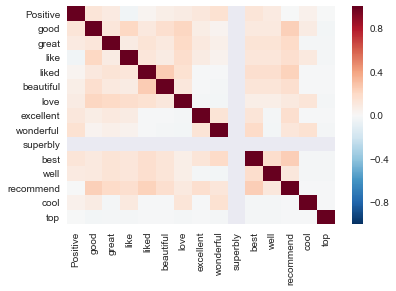

In [47]:
sns.heatmap(train.corr())

In [48]:
bnb = BernoulliNB()

In [49]:
bnb.fit(data, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [50]:
y_pred = bnb.predict(data)

In [51]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()))

Number of mislabeled points out of a total 381 points : 144


In [68]:
data1 = test[keywords]
target1 = test['Positive']

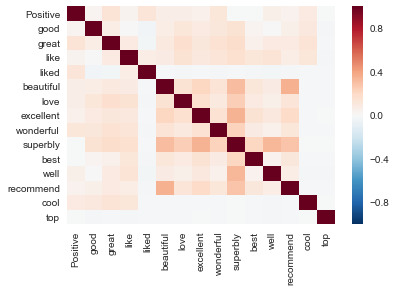

In [53]:
sns.heatmap(test.corr())

In [54]:
bnb = BernoulliNB() #change alpha?

In [69]:
bnb.fit(data1, target1) #Try different model bellsian, logistic regression 

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [70]:
y_pred1 = bnb.predict(data1)

In [71]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data1.shape[0],
    (target1 != y_pred1).sum()))

Number of mislabeled points out of a total 367 points : 144


When running both tests we can see that correlation between the words liked and superbly both seem to only appear in one test not the other. We will run the program again removing both words.

In [75]:
keywords1 = ['good', 'great', 'like', 'beautiful', 'love', 'excellent', 'wonderful', 'best', 'well', 'recommend', 'cool', 'top']

In [86]:
for key in keywords1:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.o
    sms_raw[str(key)] = sms_raw.Message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
data2 = train[keywords1]
target2 = train['Positive']

In [87]:
bnb.fit(data2, target2)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [88]:
y_pred2 = bnb.predict(data2)

In [89]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()))

#2 more incorrect points, we will add these words back in.

Number of mislabeled points out of a total 381 points : 146


Using our counter method from the previous project we will take only the top 5 most frequnetly used positive words and see if it improves both samples.

In [90]:
keywords3 = ['good', 'like', 'great', 'well', 'best']

In [91]:
for key in keywords3:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.o
    sms_raw[str(key)] = sms_raw.Message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
data3= train[keywords3]
target3 = train['Positive']

In [92]:
bnb.fit(data3, target3)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [93]:
y_pred3 = bnb.predict(data3)

In [94]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != y_pred3).sum()))

Number of mislabeled points out of a total 381 points : 167


Removing positive words from our model leads to more mistakes. Again a worse model with less features. Our next try will be with negative keywords instead of positive. We will again look at the counter from the previous example and pick out the more frequent negative words.

In [85]:
keywords_neg = ['bad', 'not', 'no', 'never', 'nothing', 'stupid', 'awful', 'terrible']

I ran the experiment for negative keywords in a different notebook due to the code in line 44 only being able to ran once. The model produced 267 mistakes a slight upgrade from 290 for our originial data set. 

From the 5 iterations of the model the most successful one was the negative keyword model. As we learned from the positive model our model improves every time we add a new feature (or word) to the keywords list. By doing this we are getting slightly more accurate each time. When we separated the positive model into a test group and a train group we saw similar results from both experiments. This means that our model is not a victim of overfitting and would preform similarly with different groups of reviews. The most important feature as stated before is the sheer volume of words used in our model. The more words the more successful our model becomes.